[[ 1.   16.99]
 [ 1.   10.34]
 [ 1.   21.01]
 [ 1.   23.68]
 [ 1.   24.59]
 [ 1.   25.29]
 [ 1.    8.77]
 [ 1.   26.88]
 [ 1.   15.04]
 [ 1.   14.78]
 [ 1.   10.27]
 [ 1.   35.26]
 [ 1.   15.42]
 [ 1.   18.43]
 [ 1.   14.83]
 [ 1.   21.58]
 [ 1.   10.33]
 [ 1.   16.29]
 [ 1.   16.97]
 [ 1.   20.65]
 [ 1.   17.92]
 [ 1.   20.29]
 [ 1.   15.77]
 [ 1.   39.42]
 [ 1.   19.82]
 [ 1.   17.81]
 [ 1.   13.37]
 [ 1.   12.69]
 [ 1.   21.7 ]
 [ 1.   19.65]
 [ 1.    9.55]
 [ 1.   18.35]
 [ 1.   15.06]
 [ 1.   20.69]
 [ 1.   17.78]
 [ 1.   24.06]
 [ 1.   16.31]
 [ 1.   16.93]
 [ 1.   18.69]
 [ 1.   31.27]
 [ 1.   16.04]
 [ 1.   17.46]
 [ 1.   13.94]
 [ 1.    9.68]
 [ 1.   30.4 ]
 [ 1.   18.29]
 [ 1.   22.23]
 [ 1.   32.4 ]
 [ 1.   28.55]
 [ 1.   18.04]
 [ 1.   12.54]
 [ 1.   10.29]
 [ 1.   34.81]
 [ 1.    9.94]
 [ 1.   25.56]
 [ 1.   19.49]
 [ 1.   38.01]
 [ 1.   26.41]
 [ 1.   11.24]
 [ 1.   48.27]
 [ 1.   20.29]
 [ 1.   13.81]
 [ 1.   11.02]
 [ 1.   18.29]
 [ 1.   17.59]
 [ 1.   20.08]
 [ 1.   16

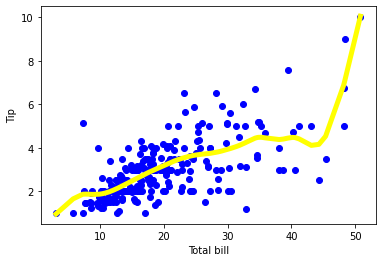

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


       
# load data points
data = pd.read_csv('tips.csv')
ColA = np.array(data.total_bill)
ColB = np.array(data.tip)
 
#preparing and add 1 in bill
mColA = np.mat(ColA)  # mat treats array as matrix
mColB = np.mat(ColB)
m= np.shape(mColB)[1]
#print(m)
one = np.ones((1,m) ,dtype=int)
#print(one)

#Horizontal Stacking
X= np.hstack((one.T,mColA.T))    
#print(X.shape)
tem=np.hstack((mColA.T)) 
#print(tem)


 #Gaussiaon Kernel    
def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    #print(weights)
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights


 #Define Local Weights
def localWeight(point,xmat,ymat,k):
    wt = kernel(point,xmat,k)
    W = (X.T*(wt*X)).I*(X.T*(wt*ymat.T))
    return W


#Final prediction value
def localWeightRegression(xmat,ymat,k):
    
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

 
#prediction value
ypred = localWeightRegression(X,mColB,2)

#Plot Regression Lines
Xvalues=X.copy()
print(Xvalues)
Xvalues.sort(axis=0)
plt.scatter(ColA, ColB, color='blue')

plt.plot(Xvalues[:,1], ypred[X[:,1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();